Episode 1, Total Reward: -5
Episode 2, Total Reward: -5
Episode 3, Total Reward: -5
Episode 4, Total Reward: -5
Episode 5, Total Reward: -5
Episode 6, Total Reward: -5
Episode 7, Total Reward: 1
Episode 8, Total Reward: 1
Episode 9, Total Reward: 1
Episode 10, Total Reward: 1
Episode 11, Total Reward: 1
Episode 12, Total Reward: -5
Episode 13, Total Reward: 1
Episode 14, Total Reward: 1
Episode 15, Total Reward: 1
Episode 16, Total Reward: 1
Episode 17, Total Reward: 1
Episode 18, Total Reward: 1
Episode 19, Total Reward: 1
Episode 20, Total Reward: -5
Episode 21, Total Reward: 1
Episode 22, Total Reward: 1
Episode 23, Total Reward: -5
Episode 24, Total Reward: -5
Episode 25, Total Reward: -5
Episode 26, Total Reward: -5
Episode 27, Total Reward: 1
Episode 28, Total Reward: 1
Episode 29, Total Reward: 1
Episode 30, Total Reward: 1
Episode 31, Total Reward: 1
Episode 32, Total Reward: 1
Episode 33, Total Reward: 1
Episode 34, Total Reward: 1
Episode 35, Total Reward: 1
Episode 36, Total

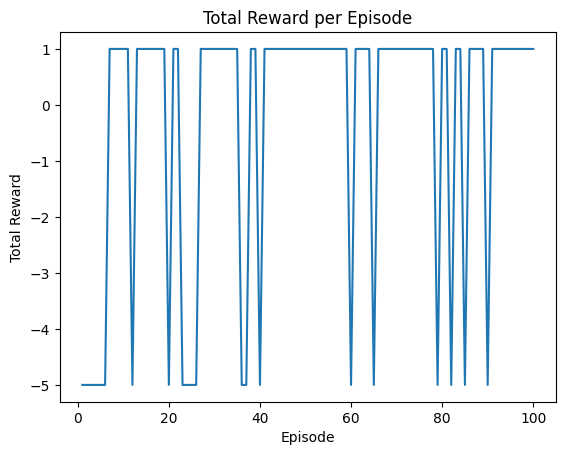

In [13]:
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

# Register the wrapper with a new environment ID
register(
    id='CustomRewardFrozenLake-v1',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4', 'is_slippery': False},
    max_episode_steps=100,
    reward_threshold=1,  # Adjust the reward threshold if needed
)

class CustomRewardFrozenLake(gym.Env):
    def __init__(self):
        self.env = gym.make("CustomRewardFrozenLake-v1")
        self.observation_space = self.env.observation_space
        self.action_space = self.env.action_space

    def step(self, action):
        state, reward, done, info = self.env.step(action)
        if reward == 0 and not done:
            reward = 0
        elif reward == 0 and done:
            reward = -5
        elif reward == 1:
            reward = 1
        return state, reward, done, info

    def reset(self):
        return self.env.reset()

    def render(self):
        self.env.render()

    def close(self):
        self.env.close()

class SARSA:
    def __init__(self, num_states, num_actions, learning_rate=0.1, discount_factor=0.9, epsilon=0.1):
        self.num_states = num_states
        self.num_actions = num_actions
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.Q_values = np.zeros((num_states, num_actions))

    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(self.num_actions)  # Random action
        else:
            return np.argmax(self.Q_values[state])  # Greedy action

    def update_Q(self, state, action, reward, next_state, next_action):
        td_target = reward + self.discount_factor * self.Q_values[next_state, next_action]
        td_error = td_target - self.Q_values[state, action]
        self.Q_values[state, action] += self.learning_rate * td_error

def run_sarsa(env, agent, num_episodes):
    rewards = []
    successful_episodes = 0

    for episode in range(num_episodes):
        state = env.reset()
        action = agent.choose_action(state)
        total_reward = 0
        done = False

        while not done:
            next_state, reward, done, _ = env.step(action)
            next_action = agent.choose_action(next_state)
            agent.update_Q(state, action, reward, next_state, next_action)
            state = next_state
            action = next_action
            total_reward += reward

        rewards.append(total_reward)
        if reward == 1:  # If the agent reached the goal state
            successful_episodes += 1

        print(f"Episode {episode + 1}, Total Reward: {total_reward}")

    success_rate = (successful_episodes / num_episodes) * 100
    print(f"Success rate: {success_rate}%")

    return rewards

# Main script
env = CustomRewardFrozenLake()
num_states = env.observation_space.n
num_actions = env.action_space.n

agent = SARSA(num_states=num_states, num_actions=num_actions)

num_episodes = 100
episode_rewards = run_sarsa(env, agent, num_episodes)

# Plotting rewards obtained in each episode
plt.plot(range(1, num_episodes + 1), episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.show()
